In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("VideoGamesSales.csv")
df.head()

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,4,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00


In [5]:
df.isnull().sum()

index             0
Rank              0
Game Title        0
Platform          0
Year             29
Genre             0
Publisher         2
North America     0
Europe            0
Japan             0
Rest of World     0
Global            0
Review            0
dtype: int64

In [7]:
df = df.dropna()
df.isnull().sum()

index            0
Rank             0
Game Title       0
Platform         0
Year             0
Genre            0
Publisher        0
North America    0
Europe           0
Japan            0
Rest of World    0
Global           0
Review           0
dtype: int64

In [8]:
import matplotlib as mpl


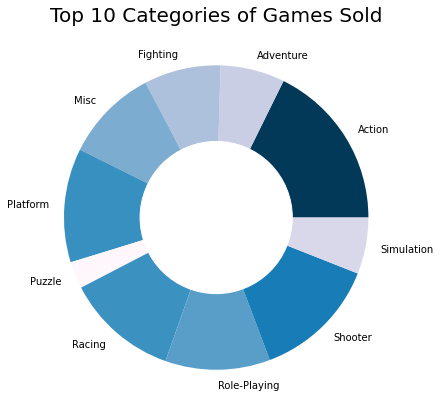

In [9]:
game = df.groupby("Genre")["Global"].count().head(10)
custom_colors = mpl.colors.Normalize(vmin=min(game), vmax = max(game))
colours = [mpl.cm.PuBu(custom_colors(i)) for i in game]
plt.figure(figsize=(7,7))
plt.pie(game, labels=game.index, colors=colours)
central_circle = plt.Circle((0,0), 0.5, color = "white")
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Top 10 Categories of Games Sold", fontsize = 20)
plt.show()

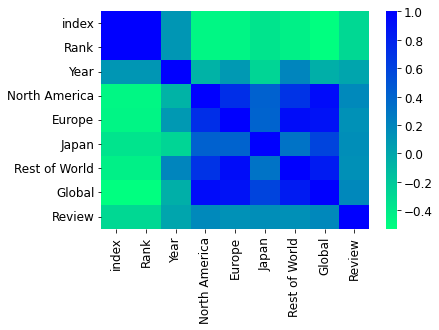

In [10]:
df.corr()
sns.heatmap(df.corr(), cmap="winter_r")
plt.show()

In [12]:
X = df[["Rank", "North America", "Europe", "Japan", "Rest of World"]]
y = df["Global"]

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)


In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [15]:
predictions

array([ 1.33999621,  1.07976249,  1.15952937,  1.7101148 ,  3.64897251,
        1.64013457,  1.58997942,  1.13974403,  0.85970975,  1.17974498,
        2.71992545,  4.11999666,  2.60011814,  0.89965863,  3.84026452,
        1.21991703,  1.87986692,  1.32999218,  0.96966985,  1.01967818,
        2.1496291 ,  0.96985445,  1.04972709,  1.01975278,  1.00959296,
        1.24968683,  1.75977864,  2.13989655,  1.22983017,  1.49984512,
        6.03055019,  5.93938844,  0.90981229,  0.93947804,  1.53988665,
        3.08021153,  1.26985591,  0.9396392 ,  1.17991032,  1.39986187,
        1.1996194 ,  1.52980785,  1.15964414,  3.02035417,  1.45975646,
        1.35984439,  1.34951547,  2.13002707,  1.04974399,  1.55984418,
        3.20018923,  1.01965761,  1.38007151,  0.94972064,  2.01942758,
        2.38018207,  1.23981485,  1.23969746,  1.66961381,  1.93015629,
        1.00995795,  1.70002464,  3.91014114,  1.81999564,  1.14993952,
        8.09080879,  2.33985633,  3.31015362,  1.14947172, 13.09